# Multi-step image pre-processing (see project for more details):

1. Convert image to gray-scale
2. Apply adaptive histogram equalization
3. Apply range filter
4. Extract edge map via Canny edge detector
5. Obtain connected edge contours
6. Apply Ramer-Douglas-Peucker(RDP) algorithm <<


In [1]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import numpy as np



In [2]:
from rdp import rdp
#newlabel_path = './data/roads/train/new_label/BLD00007_PS3_K3A_NIA0276.png'
path = './히히히.png'
path2 = './도로예측2.png'

In [3]:
from skimage.morphology import skeletonize
from skimage import data
import sknw

a = cv2.imread(path)
ske = skeletonize(a).astype(np.uint16)
ske_lee = skeletonize(a, method = 'lee').astype(np.uint16)

(-0.5, 1023.5, 1023.5, -0.5)

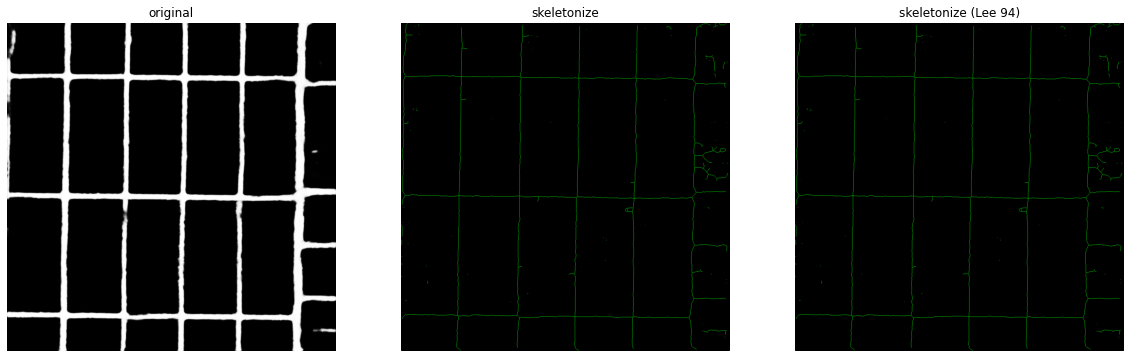

In [4]:
#fig = plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(a)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(ske, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(ske_lee, cmap=plt.cm.gray)
ax[2].set_title('skeletonize (Lee 94)')
ax[2].axis('off')

# skeletonize

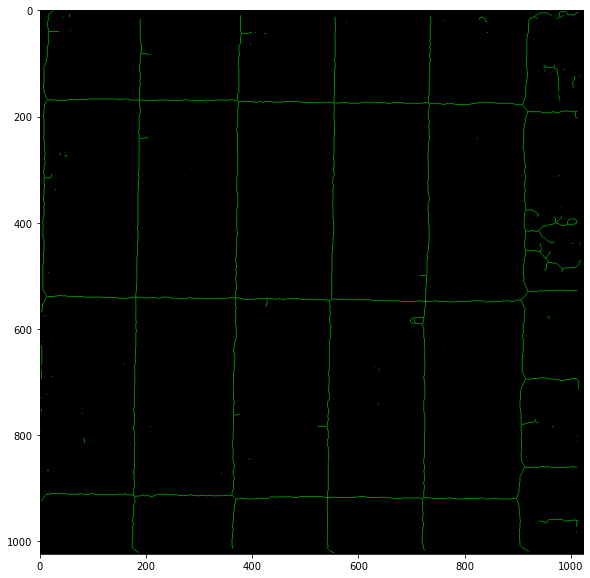

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(ske, cmap='gray')

# medial_axis

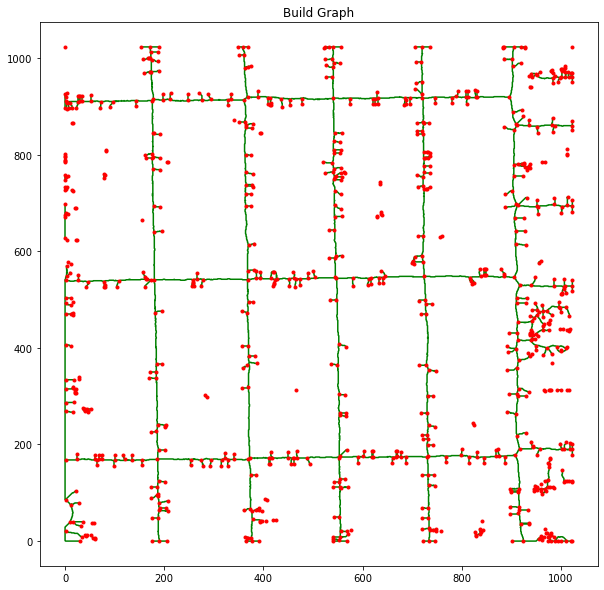

In [6]:
from skimage.morphology import medial_axis, skeletonize
gray = cv2.cvtColor(a, cv2.COLOR_RGB2GRAY)
skel, distance = medial_axis(gray, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel
graph = sknw.build_sknw(dist_on_skel)

plt.figure(figsize=(10,10))
#plt.imshow(graph)

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.')

# title and show
plt.title('Build Graph')
plt.show()

각각의 vertex 길이 계산 후 너무 작은 건 없앤 다음 다시 그래프 그려보기 

## 표준 허프 변환(Standard Hough Transform) & 멀티 스케일 허프 변환(Multi-Scale Hough Transform)

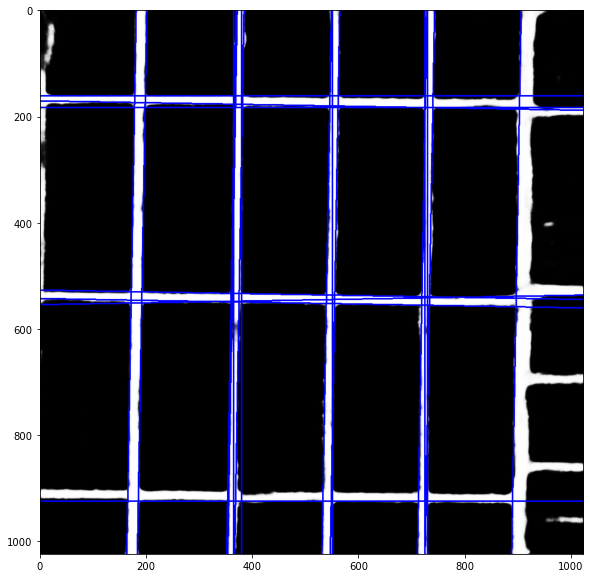

In [7]:
src = cv2.imread(path)
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLines(canny, 0.8, np.pi / 180, 150, srn = 100, stn = 200, min_theta = 0, max_theta = np.pi)

for i in lines:
    rho, theta = i[0][0], i[0][1]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a*rho, b*rho

    scale = src.shape[0] + src.shape[1]

    x1 = int(x0 + scale * -b)
    y1 = int(y0 + scale * a)
    x2 = int(x0 - scale * -b)
    y2 = int(y0 - scale * a)

    cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
   #cv2.circle(dst, (x0, y0), 3, (255, 0, 0), 5, cv2.FILLED)
plt.figure(figsize=(10,10))
plt.imshow( dst)

## 점진성 확률적 허프 변환(Progressive Probabilistic Hough Transform)

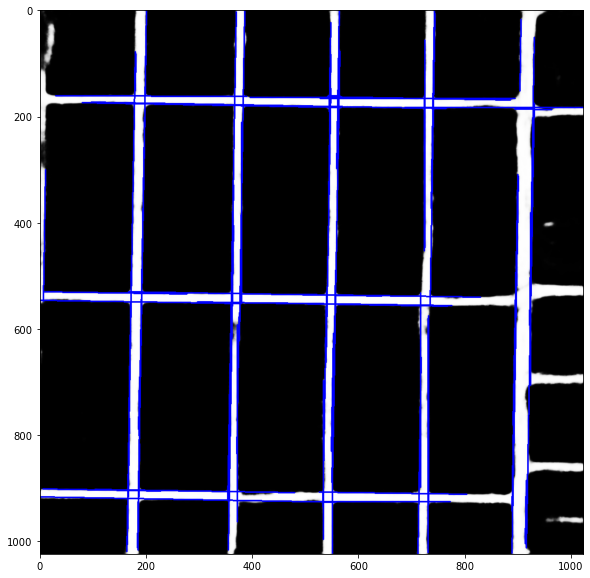

In [8]:
import numpy as np
import cv2

src = cv2.imread(path)
dst = src.copy()
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
lines = cv2.HoughLinesP(canny, 0.8, np.pi / 180, 90, minLineLength = 10, maxLineGap = 100)

for i in lines:
    cv2.line(dst, (i[0][0], i[0][1]), (i[0][2], i[0][3]), (0, 0, 255), 2)

plt.figure(figsize=(10,10))
plt.imshow(dst)

# 도로 길이 계산

length of lines detected  (202, 1, 4)
x1,y1 171 , 523  ---  x2,y2 178 , 72
x1,y1 736 , 372  ---  x2,y2 742 , 1
x1,y1 430 , 551  ---  x2,y2 773 , 556
x1,y1 189 , 672  ---  x2,y2 193 , 424
x1,y1 723 , 448  ---  x2,y2 723 , 131
x1,y1 377 , 383  ---  x2,y2 380 , 189
x1,y1 534 , 182  ---  x2,y2 687 , 182
x1,y1 178 , 154  ---  x2,y2 179 , 80
x1,y1 544 , 208  ---  x2,y2 546 , 51
x1,y1 913 , 1004  ---  x2,y2 915 , 884
x1,y1 542 , 365  ---  x2,y2 545 , 209
x1,y1 727 , 1003  ---  x2,y2 728 , 936
x1,y1 194 , 248  ---  x2,y2 199 , 0
x1,y1 358 , 679  ---  x2,y2 363 , 357
x1,y1 530 , 925  ---  x2,y2 701 , 925
x1,y1 556 , 560  ---  x2,y2 559 , 349
x1,y1 894 , 557  ---  x2,y2 896 , 464
x1,y1 550 , 1022  ---  x2,y2 550 , 685
x1,y1 729 , 611  ---  x2,y2 739 , 413
x1,y1 294 , 549  ---  x2,y2 423 , 551
x1,y1 895 , 600  ---  x2,y2 899 , 335
x1,y1 281 , 531  ---  x2,y2 629 , 537
x1,y1 378 , 427  ---  x2,y2 380 , 276
x1,y1 540 , 163  ---  x2,y2 796 , 167
x1,y1 530 , 1023  ---  x2,y2 532 , 962
x1,y1 749 , 926

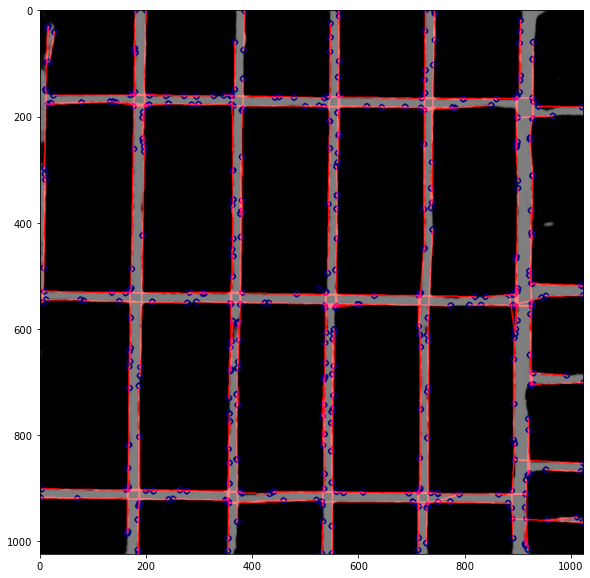

In [9]:
a = cv2.imread(path)
gray = cv2.cvtColor(a,cv2.COLOR_BGR2GRAY)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
ret,thresh = cv2.threshold(blur_gray,100,255,0)
low_threshold = 100
high_threshold = 200
edges = cv2.Canny(thresh, low_threshold, high_threshold)
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments
line_image = np.copy(a) * 0  # creating a blank to draw lines on
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print("length of lines detected ", lines.shape)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
        cv2.circle(a,(x1,y1),5,(0,0,255),2)
        cv2.circle(a,(x2,y2),5,(0,0,255),2)
        print("x1,y1", x1,",",y1, " --- ", "x2,y2", x2,",",y2)

# import math
# dist = math.sqrt( (x1-x2)**2 + (y1-y2)**2 )       
lines_edges = cv2.addWeighted(a, 0.5, line_image, 1, 0)
line_image_gray = cv2.cvtColor(line_image, cv2.COLOR_RGB2GRAY)
M = cv2.moments(line_image_gray)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cv2.circle(lines_edges, (cx, cy), 5, (0, 0, 255), 1)
plt.figure(figsize=(10,10))
plt.imshow(lines_edges)



In [10]:
b = cv2.imread(path2)
ske2 = skeletonize(b).astype(np.uint16)
ske_lee2 = skeletonize(b, method = 'lee').astype(np.uint16)

gray2 = cv2.cvtColor(b, cv2.COLOR_RGB2GRAY)
skel2, distance2 = medial_axis(gray2, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel2 = distance2 * skel2

(-0.5, 1023.5, 1023.5, -0.5)

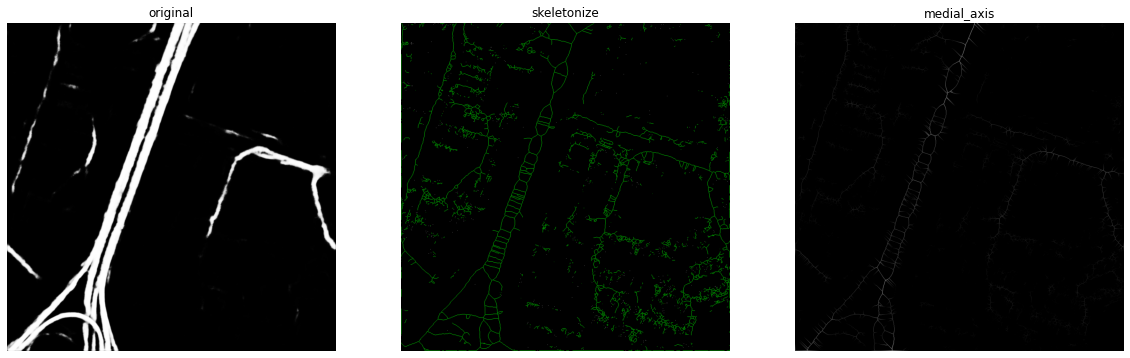

In [11]:
#fig = plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(b)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(ske2, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(dist_on_skel2, cmap=plt.cm.gray)
ax[2].set_title('medial_axis')
ax[2].axis('off')

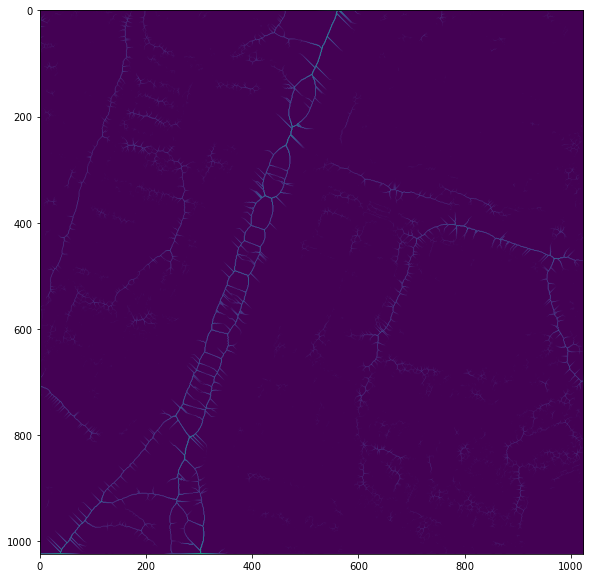

In [12]:
from skimage.morphology import medial_axis, skeletonize
gray2 = cv2.cvtColor(b, cv2.COLOR_RGB2GRAY)
skel2, distance2 = medial_axis(gray2, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel2 = distance2 * skel2
plt.figure(figsize=(10,10))
plt.imshow(dist_on_skel2)

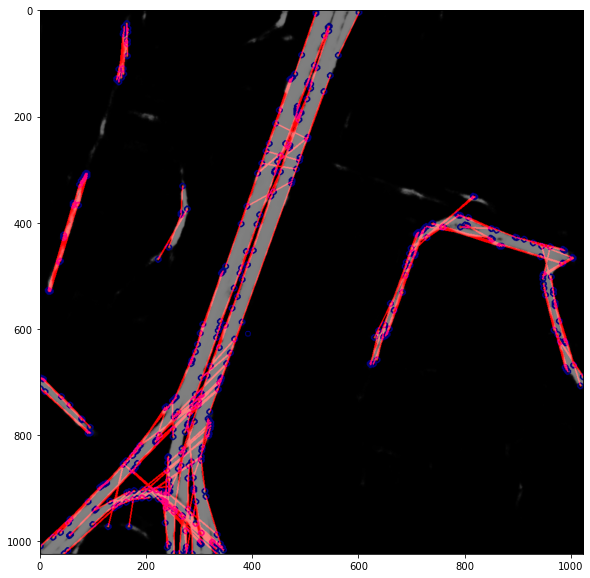

In [13]:
b = cv2.imread(path2)
gray = cv2.cvtColor(b,cv2.COLOR_BGR2GRAY)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
ret,thresh = cv2.threshold(blur_gray,100,255,0)
low_threshold = 100
high_threshold = 200
edges = cv2.Canny(thresh, low_threshold, high_threshold)
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments
line_image = np.copy(b) * 0  # creating a blank to draw lines on
# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)
        cv2.circle(b,(x1,y1),5,(0,0,255),2)
        cv2.circle(b,(x2,y2),5,(0,0,255),2)
        
lines_edges = cv2.addWeighted(b, 0.5, line_image, 1, 0)
line_image_gray = cv2.cvtColor(line_image, cv2.COLOR_RGB2GRAY)
M = cv2.moments(line_image_gray)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cv2.circle(lines_edges, (cx, cy), 5, (0, 0, 255), 1)
plt.figure(figsize=(10,10))
plt.imshow(lines_edges)

In [14]:
import cv2

src = cv2.imread(path)
dst = src.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
morp = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
morp2 = cv2.dilate(morp,kernel) - cv2.erode(morp, kernel)
#image = cv2.bitwise_not(morp)

contours, hierarchy = cv2.findContours(morp, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for i in contours:
    M = cv2.moments(i)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    
    
    perimeter = cv2.arcLength(i, True)
    epsilon = perimeter * 0.0001
    approx = cv2.approxPolyDP(i, epsilon, True)

    
    cv2.circle(dst, (cX, cY), 3, (255, 0, 0), -1)
    cv2.drawContours(dst, [i], 0, (0, 0, 255), 2)
    #cv2.drawContours(dst, [approx], 0, (0, 0, 255), 3)
#     for j in approx:
#         cv2.circle(dst, tuple(j[0]), 3, (255, 0, 0), -1)
        
# for i in range(len(contours)):
#     cv2.putText(dst, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 1.3, (255, 0, 0), 1)
#     print(i, hierarchy[0][i])
    
# cv2.imshow("dst", dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


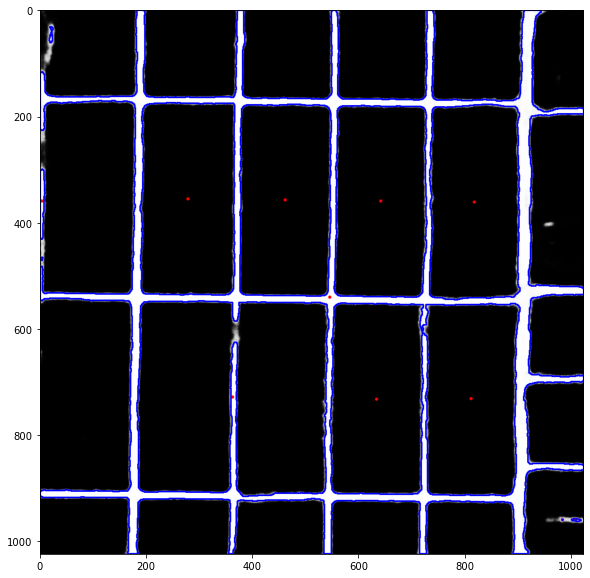

In [15]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(dst)

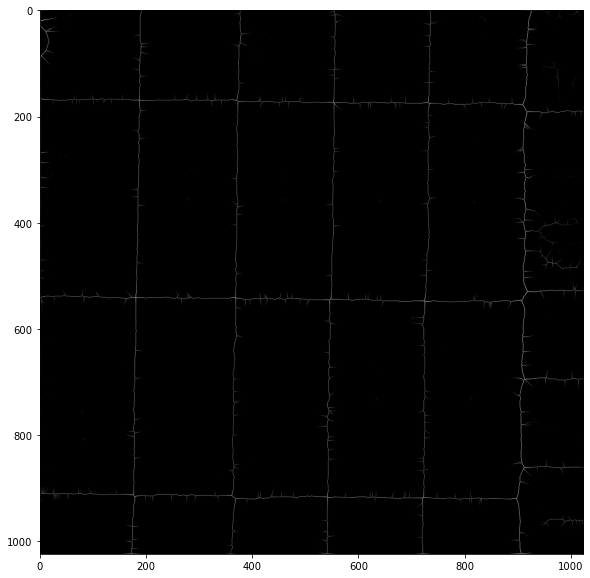

In [16]:
gray = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
skel, distance = medial_axis(gray, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel
plt.figure(figsize=(10,10))
plt.imshow(dist_on_skel, cmap='gray')

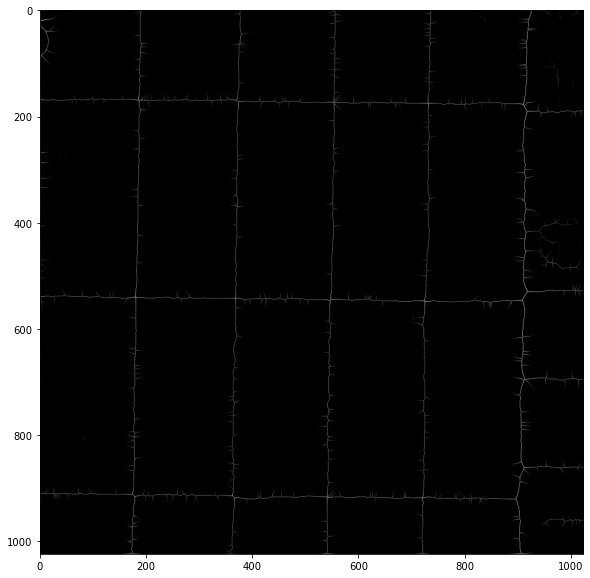

In [17]:
from skimage.morphology import medial_axis, skeletonize
gray = cv2.cvtColor(a, cv2.COLOR_RGB2GRAY)
skel, distance = medial_axis(gray, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel
plt.figure(figsize=(10,10))
plt.imshow(dist_on_skel, cmap='gray', )

(-0.5, 1023.5, 1023.5, -0.5)

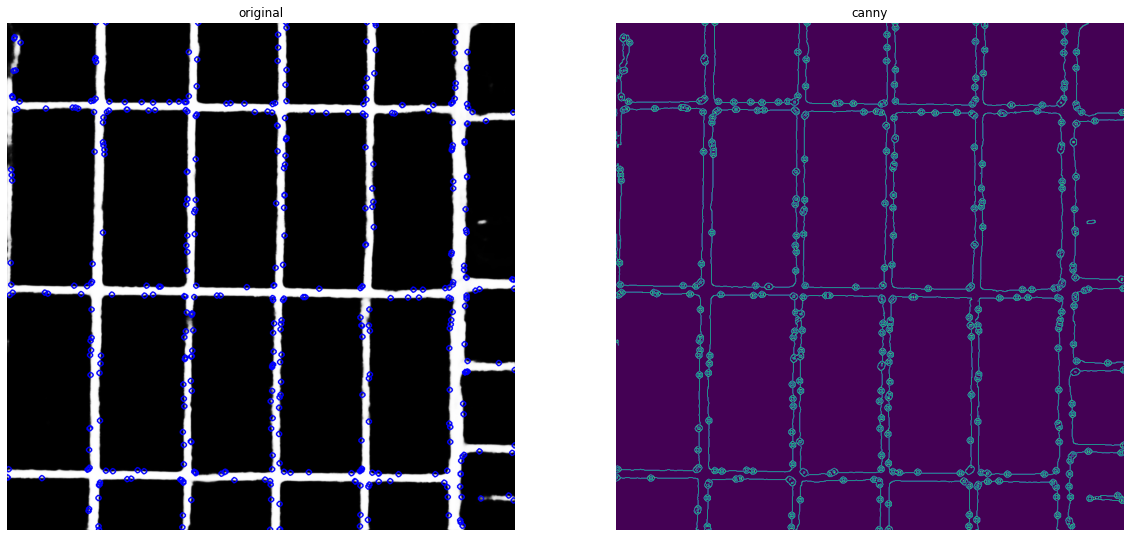

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(a)
ax[0].set_title('original')
ax[0].axis('off')


# Canny Edge Detection 
#gray = cv2.cvtColor(dist_on_skel, cv2.COLOR_RGB2GRAY)
edgeImg = cv2.Canny(a, 100, 200)
ax[1].imshow(edgeImg)
ax[1].set_title('canny')
ax[1].axis('off')

In [19]:
path

'./히히히.png'

Center line

In [13]:
from shapely.geometry import Polygon
from centerline.geometry import Centerline
from centerline.converters import create_centerlines, get_ogr_driver
import geopandas as gpd
import matplotlib.pyplot as plt
import cv2
import numpy as np

ex_path = './ㅋㅋㅋ.png'

src = cv2.imread(ex_path)
dst = src.copy()

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

ret, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)

morp = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)

contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

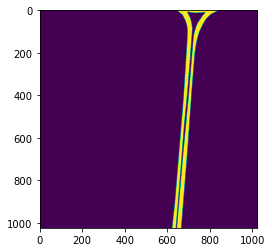

In [15]:
plt.imshow(morp)

In [16]:
poly_objs = []
for i in contours:
#     cv2.arcLength(i, True)
    cv2.drawContours(dst, [i], -1, (0, 0, 255), 1)
#     #if (i > 0) & (len(i))>2:
    poly_objs.append(Polygon(np.squeeze(i)))

#     perimeter = cv2.arcLength(i, True)
#     epsilon = perimeter * 0.05
#     approx = cv2.approxPolyDP(i, epsilon, True)
#     cv2.drawContours(dst, [approx], -1, (0, 255, 0), 1)
#     poly_objs.append(Polygon(np.squeeze(i)))


polygons = poly_objs
polygons = gpd.GeoDataFrame(polygons, columns = ['geometry'])
polygons.to_file('_polygons.shp')

# dct_centerlines = {}
# for i, geom in enumerate(poly_objs):
    
#     center_objs = Centerline(geom, 0.5)
    #center_line_shply_line = center_objs.create_centerline()
    #dct_centerlines[i] = center_line_shply_line

In [26]:
def generate_centerlines(polygon_shps):
    '''
    Create centerlines
    :param polygon_shps: input polygons
    :return: dictionary of linestrings
    '''
    dct_centerlines = {}
    for i, geom in enumerate(polygon_shps):
        print(" now running Centerline creation ", i)
        center_obj = Centerline(geom, 0.1) # works for image-extracted rivers (cell res=0.0002), if larger than this it will give me QhullError
        #center_line_shply_line = create_centerlines(center_obj, dst)
        dct_centerlines[i] = center_obj
    return dct_centerlines

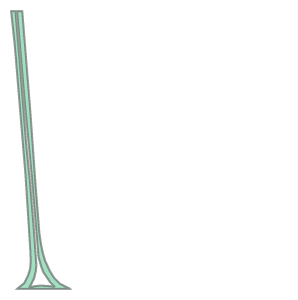

In [29]:
poly_objs[0]

In [27]:
a = generate_centerlines(poly_objs)

 now running Centerline creation  0
 now running Centerline creation  1


In [31]:
a.save()

AttributeError: 'dict' object has no attribute 'to_file'

In [ ]:
poly_objs

In [ ]:
print(polygons.iloc[0].values)

In [ ]:
def cut_hole(A, B):
    """
    Cuts a "hole" into shapely polygon A
    :return: The polygon resulting of the operation A-B. Might be empty!
    """
    outer = A #not in my code, just to point out what I mean
    inner = B
    return outer.difference(inner)

In [ ]:
res = generate_centerlines(poly_objs)

In [ ]:
res[0]

In [ ]:
from skimage.morphology import medial_axis, skeletonize

a = cv2.imread(path)

gray = cv2.cvtColor(a, cv2.COLOR_RGB2GRAY)
skel, distance = medial_axis(gray, return_distance=True)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel
plt.figure(figsize=(10,10))
plt.imshow(dist_on_skel, cmap='gray', )